## **Данные для исследования**

Набор данных представляет собой записи о транзакциях сети кофеен Maven Roasters (3 заведения в Нью-Йорке) за первое полугодие 2023 года. Данные содержат дату, время, место покупки и детальный состав каждого заказа.

Поля таблицы:

* transaction_id : Уникальный последовательный идентификатор, представляющий конкретную транзакцию
* transaction_date : Дата транзакции (ММ/ДД/ГГ)
* transaction_time : Время транзакции (ЧЧ:ММ:СС)
* transaction_qty : Количество проданных единиц товара
* store_id : Уникальный идентификатор кофейни, где произошла транзакция
* store_location : Местоположение кофейни, где произошла транзакция
* product_id : Уникальный идентификатор проданного товара
* unit_price : Розничная цена проданного товара
* product_category : Описание категории товара
* product_type : Описание типа товара
* product_detail : Описание конкретного товара (детализация позиции)

## **Импорт библиотек и загрузка данных**

In [383]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [384]:
! gdown --id 18f2KsmBe6rlT8Xsf-2xveUydEIvgeSaZ

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18f2KsmBe6rlT8Xsf-2xveUydEIvgeSaZ
To: /content/Coffee_Shop_Sales.xlsx
100% 8.97M/8.97M [00:00<00:00, 61.1MB/s]


In [385]:
df = pd.read_excel('Coffee_Shop_Sales.xlsx')

In [386]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [387]:
df.shape

(149116, 11)

## **Предобработка данных**

In [388]:
df.duplicated().sum()

np.int64(0)

In [389]:
df.isna().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [390]:
df.dtypes

,0
transaction_id,int64
transaction_date,datetime64[ns]
transaction_time,object
transaction_qty,int64
store_id,int64
store_location,object
product_id,int64
unit_price,float64
product_category,object
product_type,object


<Axes: ylabel='unit_price'>

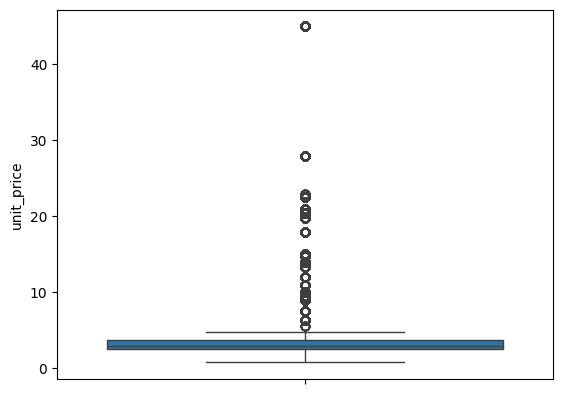

In [391]:
sns.boxplot(y = "unit_price", data = df)

Можно предположить наличие выбросов, но такая разница в цене ожидаема для разных товаров кофейни

В данных отсутствуют пропуски, дубликаты и выбросы

In [392]:
df["year"] = df["transaction_date"].dt.year

df["month"] = df["transaction_date"].dt.month_name()

df["day"] = df["transaction_date"].dt.day_name()

df["hour"] = df["transaction_time"].apply(lambda x : x.hour)

In [393]:
df['total_price'] = df['unit_price'] * df['transaction_qty'] # Добавление столбца с итоговой суммой транзакции

In [394]:
df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,year,month,day,hour,total_price
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday,7,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,7,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday,7,9.0


## **Анализ и визуализация**

In [395]:
df['year'].unique()

array([2023], dtype=int32)

In [396]:
df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [397]:
df['transaction_date'].min()

Timestamp('2023-01-01 00:00:00')

In [398]:
df['transaction_date'].max()

Timestamp('2023-06-30 00:00:00')

Данные за период с 1 января по 30 июня 2023 года

### Анализ по временным периодам

In [399]:
transactions_by_month = df.groupby('month')['transaction_id'].count()
transactions_by_month

,transaction_id
month,
April,25335
February,16359
January,17314
June,35352
March,21229
May,33527


In [400]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
transactions_by_month_sorted = transactions_by_month.reindex(month_order)
transactions_by_month_sorted

,transaction_id
month,
January,17314
February,16359
March,21229
April,25335
May,33527
June,35352


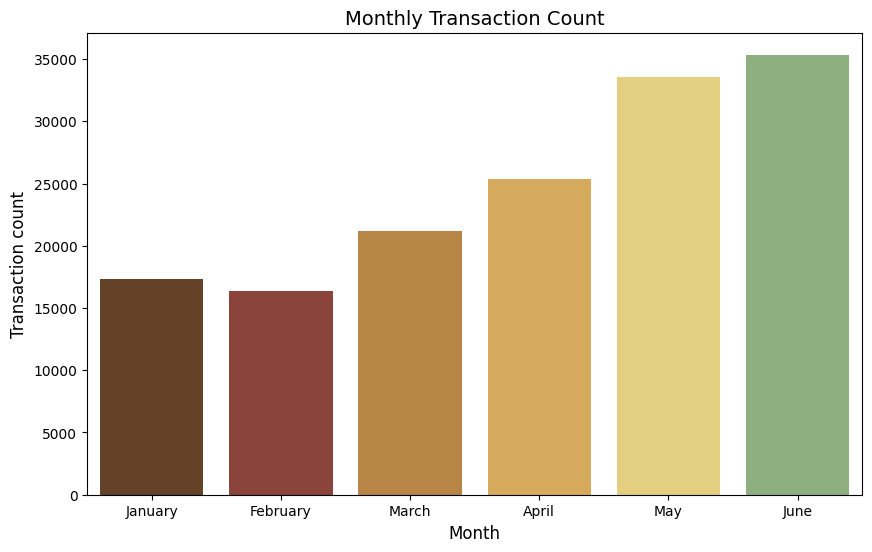

In [401]:
plt.figure(figsize=(10, 6))

sns.barplot(x=transactions_by_month_sorted.index, y=transactions_by_month_sorted.values, hue=transactions_by_month_sorted.index,
            palette=['#5E2C04', '#8C2318', '#C57B1C', '#E8A735', '#F4D35E', '#7FB069'], alpha=0.9)
plt.title('Monthly Transaction Count', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Transaction count', fontsize=12)

plt.show()

In [402]:
revenue_by_month = df.groupby('month')['total_price'].sum()
revenue_by_month.name = 'revenue'
revenue_by_month.reindex(month_order)

,revenue
month,
January,81677.74
February,76145.19
March,98834.68
April,118941.08
May,156727.76
June,166485.88


<Axes: title={'center': 'Monthly Revenue'}, xlabel='Month', ylabel='Revenue ($)'>

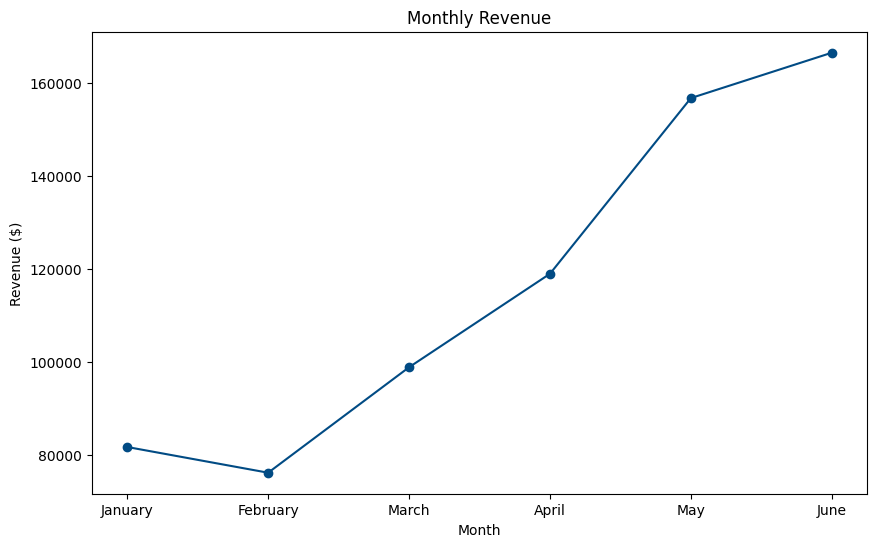

In [403]:
revenue_by_month = df.groupby('month')['total_price'].sum()
revenue_by_month.reindex(month_order).plot(kind='line', xlabel='Month', ylabel='Revenue ($)', title='Monthly Revenue', figsize=(10, 6),
                                           marker='o', markersize = 6, color='#014B84')

In [404]:
transactions_by_day = df.groupby('day')['transaction_id'].count()
transactions_by_day

,transaction_id
day,
Friday,21701
Monday,21643
Saturday,20510
Sunday,21096
Thursday,21654
Tuesday,21202
Wednesday,21310


In [405]:
days_order = ['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday','Sunday']
transactions_by_day_sorted = transactions_by_day.reindex(days_order)
transactions_by_day_sorted

,transaction_id
day,
Monday,21643
Tuesday,21202
Wednesday,21310
Thursday,21654
Friday,21701
Saturday,20510
Sunday,21096


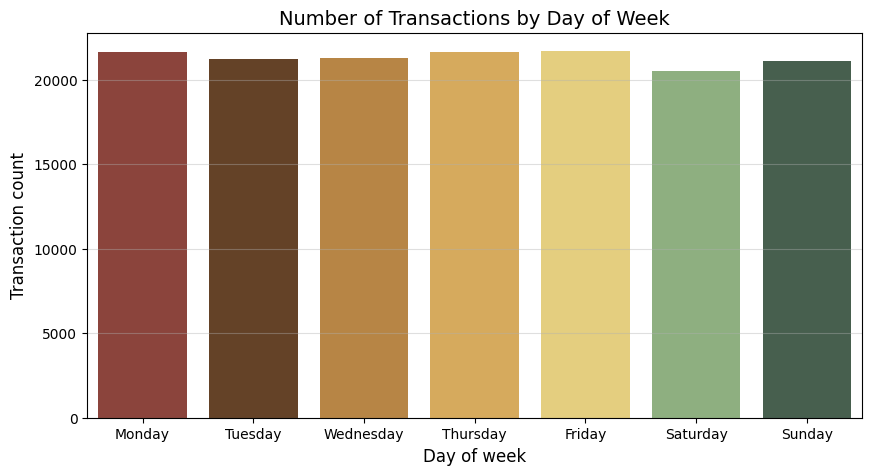

In [406]:
plt.figure(figsize=(10, 5))
sns.barplot(x=transactions_by_day_sorted.index, y=transactions_by_day_sorted.values, hue=transactions_by_day_sorted.index,
            palette=['#8C2318', '#5E2C04', '#C57B1C', '#E8A735', '#F4D35E', '#7FB069', '#2E5339'], alpha=0.9)

plt.title('Number of Transactions by Day of Week', fontsize=14)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Transaction count', fontsize=12)
plt.grid(axis='y', alpha=0.4)

plt.show()

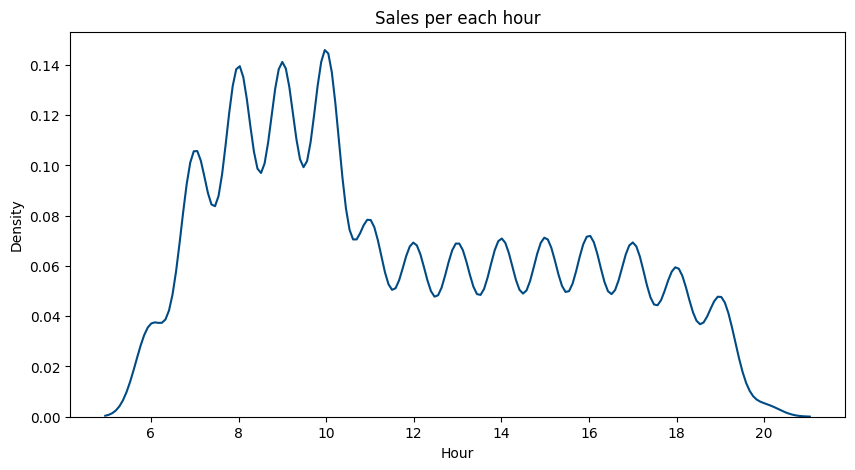

In [407]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df["hour"], color='#014B84')
plt.title('Sales per each hour')
plt.xlabel('Hour')
plt.show()

Большинство покупок происходит с 7:30 до 10:00

### Анализ по расположению

In [408]:
df['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [409]:
df['store_id'].unique()

array([5, 8, 3])

Данные представлены по трём заведениям сети. Заведения расположены в разных районах города

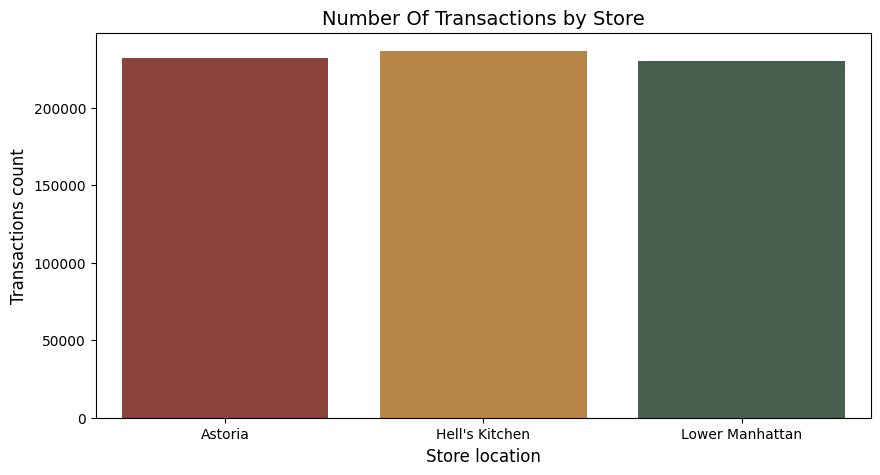

In [410]:
transactions_by_store = df.groupby('store_location')['total_price'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=transactions_by_store.index, y=transactions_by_store.values, hue=transactions_by_store.index, palette=['#8C2318', '#C57B1C', '#2E5339'], alpha=0.9)
plt.title('Number Of Transactions by Store', fontsize=14)
plt.xlabel('Store location', fontsize=12)
plt.ylabel('Transactions count', fontsize=12)

plt.show()

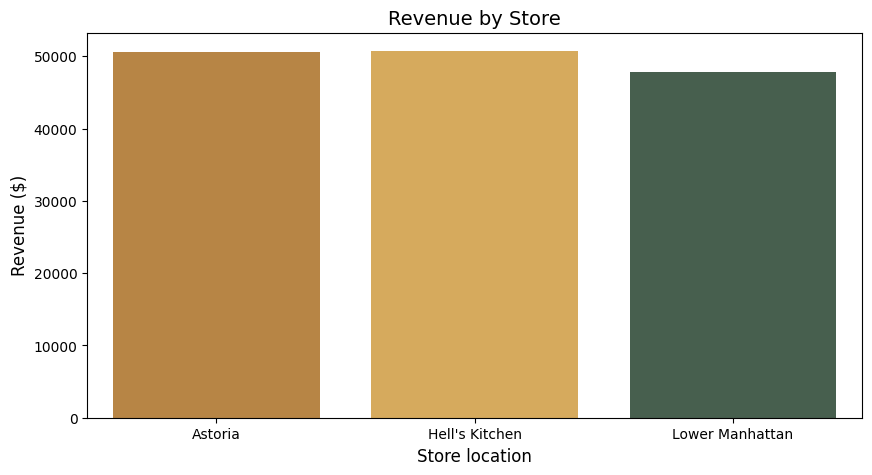

In [411]:
transactions_by_store = df.groupby('store_location')['transaction_id'].count()
plt.figure(figsize=(10, 5))
sns.barplot(x=transactions_by_store.index, y=transactions_by_store.values, hue=transactions_by_store.index, palette=['#C57B1C', '#E8A735', '#2E5339'], alpha=0.9)
plt.title('Revenue by Store', fontsize=14)
plt.xlabel('Store location', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)

plt.show()

### Анализ цен товаров

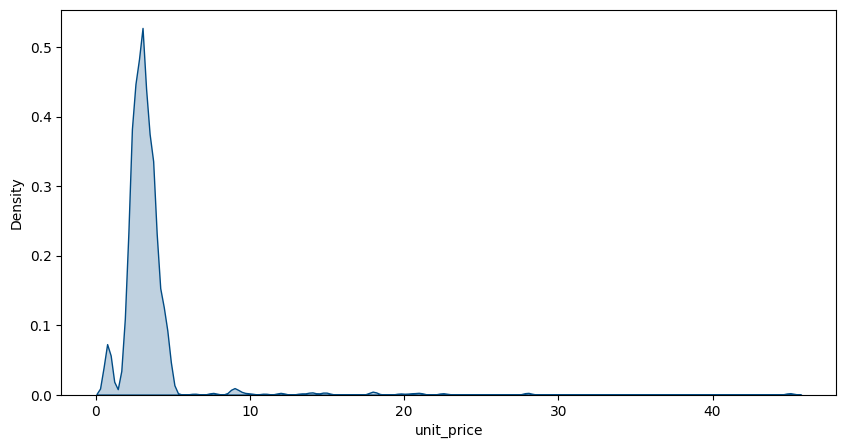

In [412]:
plt.figure(figsize=(10, 5))
sns.kdeplot(x = df["unit_price"], fill=True, color='#014B84')
plt.show()

In [413]:
df['unit_price'].max()

45.0

Большинство товаров продаётся по цене до 5 долларов, в то время как некоторые товары продаются по значительно более высоким ценам. Максимальной ценой является цена в 45 долларов

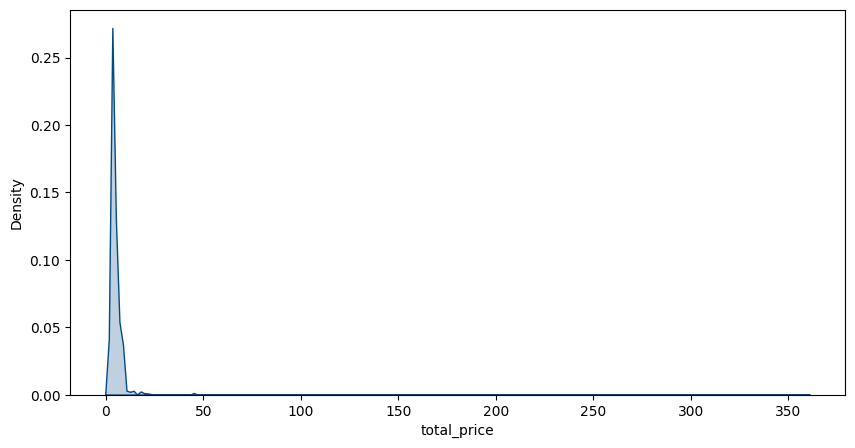

In [414]:
plt.figure(figsize=(10, 5))
sns.kdeplot(x = df["total_price"], fill=True, color='#014B84')
plt.show()

In [415]:
df['total_price'].max()

360.0

Большинство покупок совершается на сумму до примерно 20 долларов, но есть значительно более дорогие покупки. Самая большая стоимость покупки - 360 долларов



### Анализ спроса на товары

In [416]:
transactions_count_by_categories = df.groupby('product_category')['transaction_id'].count()
transactions_count_by_categories.name = 'Transactions_count'
transactions_count_by_categories

,Transactions_count
product_category,
Bakery,22796
Branded,747
Coffee,58416
Coffee beans,1753
Drinking Chocolate,11468
Flavours,6790
Loose Tea,1210
Packaged Chocolate,487
Tea,45449


In [417]:
sum_of_transactions_count = df.groupby('product_category')['transaction_id'].count().sum()
ratio_of_transactions_count = round(df.groupby('product_category')['transaction_id'].count()/sum_of_transactions_count*100, 2)
ratio_of_transactions_count.name = 'Transaction share (%)'
ratio_of_transactions_count

,Transaction share (%)
product_category,
Bakery,15.29
Branded,0.50
Coffee,39.17
Coffee beans,1.18
Drinking Chocolate,7.69
Flavours,4.55
Loose Tea,0.81
Packaged Chocolate,0.33
Tea,30.48


In [418]:
total_prices_by_categories = df.groupby('product_category')['total_price'].sum()
total_prices_by_categories.name = 'Revenue'
total_prices_by_categories

,Revenue
product_category,
Bakery,82315.64
Branded,13607.00
Coffee,269952.45
Coffee beans,40085.25
Drinking Chocolate,72416.00
Flavours,8408.80
Loose Tea,11213.60
Packaged Chocolate,4407.64
Tea,196405.95


In [419]:
sum_of_total_prices = df['total_price'].sum()
ratio_of_revenue = round(df.groupby('product_category')['total_price'].sum()/sum_of_total_prices * 100, 2)
ratio_of_revenue.name = 'Share of Revenue (%)'
ratio_of_revenue

,Share of Revenue (%)
product_category,
Bakery,11.78
Branded,1.95
Coffee,38.63
Coffee beans,5.74
Drinking Chocolate,10.36
Flavours,1.20
Loose Tea,1.60
Packaged Chocolate,0.63
Tea,28.11


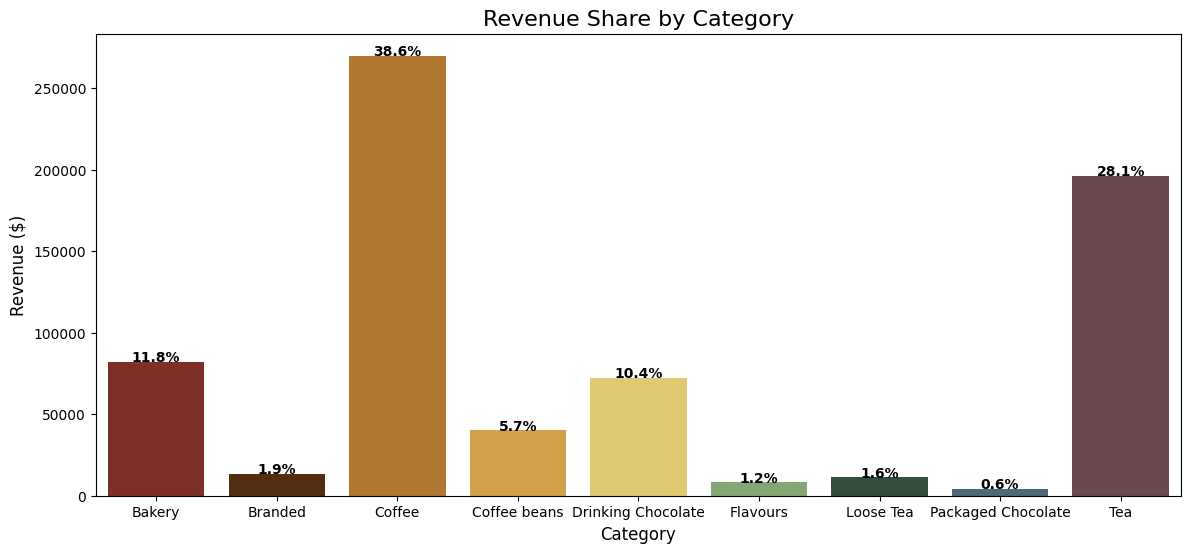

In [420]:
plt.figure(figsize=(14, 6))

df_plot = total_prices_by_categories.to_frame('total_price').reset_index()
graph = sns.barplot(data=df_plot, x='product_category', y='total_price', hue=df_plot.index,
                    palette=['#8C2318', '#5E2C04', '#C57B1C', '#E8A735', '#F4D35E', '#7FB069', '#2E5339', '#4A6B7C', '#6D454C'], legend=False)

for i, (value, perc) in enumerate(zip(total_prices_by_categories.values, ratio_of_revenue.values)):
    graph.text(i, value + 1, f'{perc:.1f}%', ha='center', fontweight='bold')

plt.title('Revenue Share by Category', fontsize=16)
plt.xlabel('Category', fontsize = 12)
plt.ylabel('Revenue ($)', fontsize = 12)


plt.show()

Кофе и чай - две самые продаваемые категории товаров. Рассмотрим их более подробно.

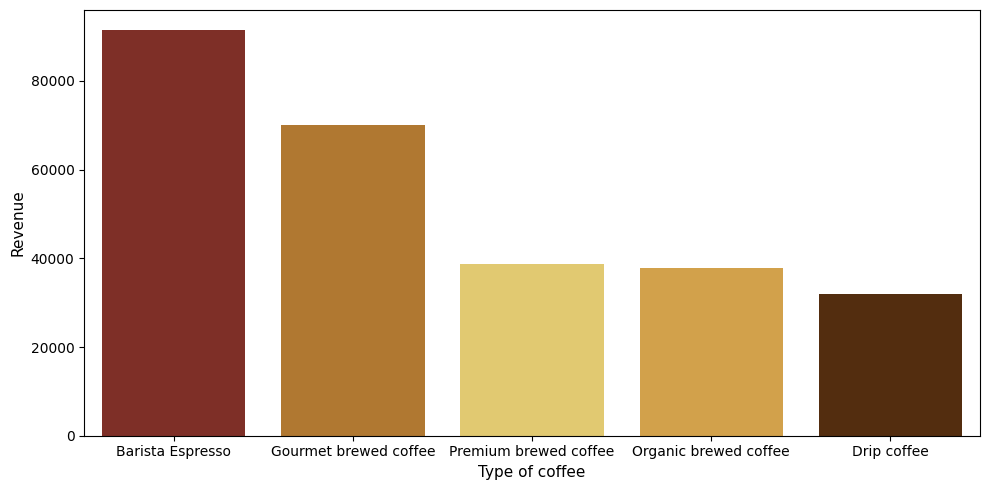

In [421]:
plt.figure(figsize=(10, 5))

coffee_types = (df[df['product_category'] == 'Coffee'].groupby('product_type', as_index=False)['total_price'].sum())

sorted_df_coffee = coffee_types.sort_values('total_price', ascending=False)

sns.barplot(data = sorted_df_coffee, x='product_type', y='total_price', hue=sorted_df_coffee.index,
            palette = ['#8C2318', '#5E2C04', '#C57B1C', '#E8A735', '#F4D35E'], legend=False)
plt.xlabel('Type of coffee', fontsize = 11)
plt.ylabel('Revenue', fontsize = 11)
plt.tight_layout()
plt.show()

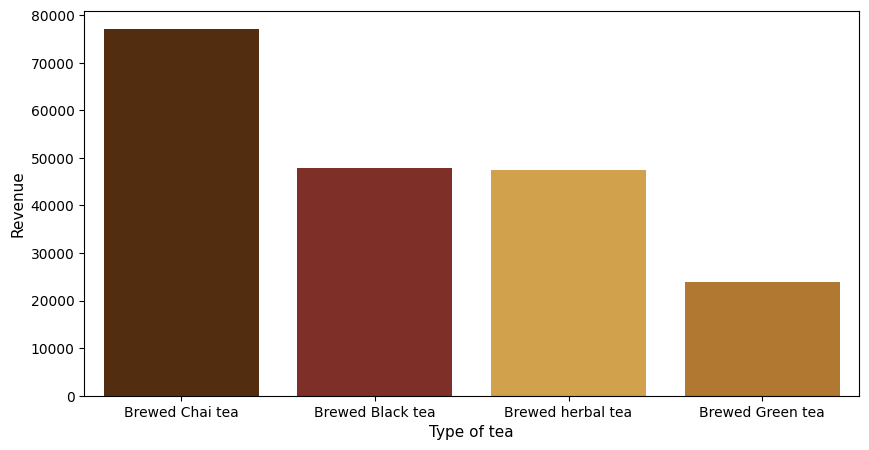

In [422]:
plt.figure(figsize=(10, 5))

tea_types = (df[df['product_category'] == 'Tea'].groupby('product_type', as_index=False)['total_price'].sum())

sorted_df_tea = tea_types.sort_values('total_price', ascending=False)

sns.barplot(data = sorted_df_tea, x='product_type', y='total_price', hue=sorted_df_tea.index, palette=['#8C2318', '#5E2C04', '#C57B1C', '#E8A735'], legend=False)
plt.xlabel('Type of tea', fontsize = 11)
plt.ylabel('Revenue', fontsize = 11)
plt.show()

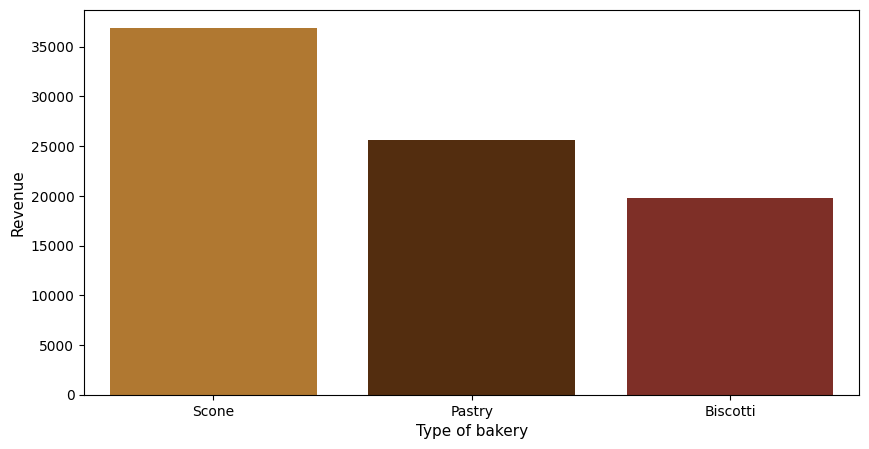

In [423]:
plt.figure(figsize=(10, 5))

bakery_types = (df[df['product_category'] == 'Bakery'].groupby('product_type', as_index=False)['total_price'].sum())

sorted_df_bakery = bakery_types.sort_values('total_price', ascending=False)

sns.barplot(data = sorted_df_bakery, x='product_type', y='total_price', hue=sorted_df_bakery.index, palette=['#8C2318', '#5E2C04', '#C57B1C'], legend=False)
plt.xlabel('Type of bakery', fontsize = 11)
plt.ylabel('Revenue', fontsize = 11)
plt.show()

In [424]:
avegare_transaction_value = round(float(df['total_price'].mean()), 2)
avegare_transaction_value

4.69

Средний чек - 4.69$

In [425]:
avegare_transaction_value_per_week = round(df.groupby('day')['total_price'].mean(), 2) # Средний чек по дням недели
avegare_transaction_value_per_week

,total_price
day,
Friday,4.67
Monday,4.70
Saturday,4.72
Sunday,4.66
Thursday,4.65
Tuesday,4.69
Wednesday,4.71


Средний чек колеблется в пределах от 4.65 до 4.72, что говорит о стабильном уровне покупательской активности в течение недели.


Средний чек остаётся равномерным на протяжении недели, без ярко выраженных пиков и спадов. Это говорит об устойчивом клиентском потоке и предсказуемом поведении покупателей.

In [426]:
avegare_transaction_value_per_month = round(df.groupby('month')['total_price'].mean(), 2) # Средний чек по месяцам
avegare_transaction_value_per_month

,total_price
month,
April,4.69
February,4.65
January,4.72
June,4.71
March,4.66
May,4.67


Средний чек в разные месяца также стабильный, без сильных колебаний

In [427]:
product_sales = df.groupby(['product_type', 'product_detail'])['total_price'].sum()
product_sales.nlargest(5)

product_type      product_detail              
Hot chocolate     Sustainably Grown Organic Lg    21151.75
                  Dark chocolate Lg               21006.00
Barista Espresso  Latte Rg                        19112.25
                  Cappuccino Lg                   17641.75
Brewed Chai tea   Morning Sunrise Chai Lg         17384.00
Name: total_price, dtype: float64

In [428]:
product_sales.nsmallest(5)

,,total_price
product_type,product_detail,
Drinking Chocolate,Dark chocolate,755.2
Black tea,Earl Grey,1270.9
Chai tea,Spicy Eye Opener Chai,1335.9
Green beans,Guatemalan Sustainably Grown,1340.0
Herbal tea,Lemon Grass,1360.4


In [429]:
product_sales_amount = df.groupby(['product_type', 'product_detail'])['transaction_qty'].sum()
product_sales_amount.nlargest(5)

,,transaction_qty
product_type,product_detail,
Brewed Black tea,Earl Grey Rg,4708
Hot chocolate,Dark chocolate Lg,4668
Brewed Chai tea,Morning Sunrise Chai Rg,4643
Barista Espresso,Latte,4602
Brewed herbal tea,Peppermint Rg,4564


In [430]:
product_sales_amount.nsmallest(5)

,,transaction_qty
product_type,product_detail,
Drinking Chocolate,Dark chocolate,118
Chai tea,Spicy Eye Opener Chai,122
Green beans,Guatemalan Sustainably Grown,134
Black tea,Earl Grey,142
Premium Beans,Jamacian Coffee River,146


Sustainably Grown Organic Lg - товар, приносящий самую большую выручку. Earl Grey Rg - товар, который покупают чаще всего.

In [431]:
product_sales_amount.nlargest(11)

,,transaction_qty
product_type,product_detail,
Brewed Black tea,Earl Grey Rg,4708
Hot chocolate,Dark chocolate Lg,4668
Brewed Chai tea,Morning Sunrise Chai Rg,4643
Barista Espresso,Latte,4602
Brewed herbal tea,Peppermint Rg,4564
Gourmet brewed coffee,Columbian Medium Roast Rg,4547
Brewed Chai tea,Traditional Blend Chai Rg,4512
Barista Espresso,Latte Rg,4497
Drip coffee,Our Old Time Diner Blend Sm,4484


In [432]:
df[(df['product_type'] == 'Hot chocolate')  & (df['product_detail'] == 'Sustainably Grown Organic Lg')]['unit_price']

,unit_price
19,4.75
99,4.75
200,4.75
211,4.75
298,4.75
...,...
148747,4.75
148876,4.75
148884,4.75
148889,4.75


In [433]:
float(df['unit_price'].quantile(0.97))

4.75

Sustainably Grown Organic из категории Hot Chocolate - Lg 11-й по количеству продаж товар, но за счёт высокой цены 4.75$, которая является 97-м перцентилем, этот товар приносит наибольшую выручку.

In [434]:
product_sales = df.groupby(['product_type', 'product_detail'])['total_price'].sum()
product_sales.nlargest(26)

product_type           product_detail              
Hot chocolate          Sustainably Grown Organic Lg    21151.75
                       Dark chocolate Lg               21006.00
Barista Espresso       Latte Rg                        19112.25
                       Cappuccino Lg                   17641.75
Brewed Chai tea        Morning Sunrise Chai Lg         17384.00
Barista Espresso       Latte                           17257.50
Premium brewed coffee  Jamaican Coffee River Lg        16481.25
Hot chocolate          Sustainably Grown Organic Rg    16233.75
Barista Espresso       Cappuccino                      15997.50
Organic brewed coffee  Brazilian Lg                    15109.50
Gourmet brewed coffee  Ethiopia Lg                     14794.50
Hot chocolate          Dark chocolate Rg               14024.50
Brewed Chai tea        Spicy Eye Opener Chai Lg        13652.40
Gourmet brewed coffee  Ethiopia Rg                     13179.00
Organic brewed coffee  Brazilian Rg                    13155.00
Brewed herbal tea      Peppermint Lg                   13050.00
Brewed Black tea       English Breakfast Lg            12927.00
                       Earl Grey Lg                    12735.00
Brewed Green tea       Serenity Green Tea Lg           12660.00
Gourmet brewed coffee  Columbian Medium Roast Lg       12585.00
Brewed Chai tea        Traditional Blend Chai Lg       12522.00
Barista Espresso       Espresso shot                   12495.00
Premium brewed coffee  Jamaican Coffee River Rg        12455.80
Brewed herbal tea      Lemon Grass Lg                  12267.00
Drip coffee            Our Old Time Diner Blend Lg     11991.00
Brewed Black tea       Earl Grey Rg                    11770.00
Name: total_price, dtype: float64

In [435]:
df[(df['product_type'] == 'Brewed Black tea')  & (df['product_detail'] == 'Earl Grey Rg')]['unit_price']

,unit_price
71,2.5
144,2.5
153,2.5
170,2.5
173,2.5
...,...
148962,2.5
149006,2.5
149032,2.5
149061,2.5


In [436]:
float(df['unit_price'].quantile(0.15))

2.5

Товар Earl Grey Rg из категории Brewed Black tea продаётся чаще всех остальных товаров, однако лишь на 26-й позиции по приносимой выручке. Причиной этому является низкая цена 2.5$, которая является 15-м перцентилем.

---
## **Выводы**
### Динамика продаж по месяцам

Данные представлены за период с 1 января по 30 июня 2023 года.

Выручка за январь составила 81677.74$.

Далее в феврале произошло падение на 6.8% до 76145.19$.

После этого, начиная с марта, наблюдается устойчивый рост выручки:

* на 29.8% в марте (98834.68$)

* на 20.3% в апреле (118941.08$)

* на 31.8% В мае (156727.76$)

* на 6.2% в июне (166485.88$)


За 6 месяцев рост составил 103.8%. Средний чек за все месяцы - 4.69$. Средний чек по месяцам отличается незначительно, разброс примерно 1.5%, что говорит о том, что рост выручки происходит именно по причине увеличения клиентского потока. Можно заключить, что кофейня находится на стадии активного роста.

В июне рост сохраняется, но его темпы замедляются. Это может говорить о том, что бизнес выходит на новый устойчивый уровень выручки.

Просадка в феврале возможна из-за того, что этот месяц является самым коротким, а также из-за того, что после новогодних праздников многие люди тратят меньше, чем обычно ввиду того, что расходы в январе и особенно в декабре обычно повышенные.

---

### Анализ продаж по дням недели

В будние дни количество транзакций стабильное, без резких колебаний. В выходные дни наблюдается спад продаж. Спад особенно выражен в субботу: на этот день недели приходится меньше всего заказов, имеется значительная разница количества транзакций по сравнению с другими днями недели.

Причиной такой динамики может быть то, что кофейня имеет сформировавшийся поток людей, посещающих её в будние дни, - вероятно, офисных работников, студентов. В выходные дни эти категории людей не придёрживаются расписания будних дней и могут не иметь потребности в посещении кофейни.

---

### Анализ продаж по часам

К 7:00 продажи выходят на высокий уровень после постепенного роста с момента открытия в 5:00. Больше всего продаж происходит во временной интервал с 7:30 до 10:00. После пикового времени продажи выходят на средний уровень, а к 20:00 наблюдается резкий спад продаж.

Такое распределение продаж по часа объясняется тем, что в утреннее время с 7:00 до 10:00 люди идут на работу, учёбу или по другим делам. В это время значительная часть людей берёт с собой кофе, выпечку и другие товары или завтракает в кофейне. После высокого спроса утром офисные сотрудники уже на рабочих местах и покупают кофе в перерывах, но не так массово, как утром. Вечером наблюдается естественный для кофеен спад продаж. В такое время люди намного реже пьют кофе из-за эффекта, который даёт кофеин, испытывают меньшую потребность в выпечке и других товарах кофейни.

---

### Сравнение продаж товаров

Наиболее продаваемые категории товаров:
1. Coffee (38.6%)
2. Tea (28.1%)
3. Bakery (11.8%)

Наименее продаваемые категории (процент от общей выручки):
1. Packaged chocolate (0.6%)
2. Flavours (1.2%)
3. Loose tea (1.6%)

Также присутвуют категории:
*   Drinking chocolate (10.4%)
*   Coffee beans (5.7%)
*   Branded (1.9%)

Чаще всего продаются данные товары:
1. Brewed Black tea	Earl Grey Rg	(4708)
2. Hot chocolate	Dark chocolate Lg	(4668)
3. Brewed Chai tea	Morning Sunrise Chai Rg	(4643)
4. Barista Espresso	Latte	(4602)
5. Brewed herbal tea	Peppermint Rg	(4564)

в скобках указано общее количество проданных единиц товара за рассматриваемый период


Самую большую выручку приносят следующие 5 товаров:
1. Hot chocolate	Sustainably Grown Organic Lg	(21151.75)
2. Dark chocolate Lg	(21006.00)
3. Barista Espresso	Latte Rg	(19112.25)
4. Cappuccino Lg	(17641.75)
5. Brewed Chai tea	Morning Sunrise Chai Lg	(17384.00)

в скобках указана общая выручка с продажи этих товаров за рассматриваемый период

Меньше всего продаются следующие товары:
1. Drinking Chocolate	Dark chocolate	(118)
2. Chai tea	Spicy Eye Opener Chai	(122)
3. Green beans	Guatemalan Sustainably Grown (134)
4. Black tea	Earl Grey	(142)
5. Premium Beans	Jamacian Coffee River	(146)

в скобках указано общее количество проданных единиц товара за рассматриваемый период

Товары, приносящие наименьшую выручку:
1. Drinking Chocolate	Dark chocolate	(755.2)
2. Black tea Earl Grey	(1270.9)
3. Chai tea	Spicy Eye Opener Chai	(1335.9)
4. Green beans	Guatemalan Sustainably Grown	(1340.0)
5. Herbal tea	Lemon Grass	(1360.4)

в скобках указана общая выручка с продажи этих товаров за рассматриваемый период

---

Был проведён анализ данных о работе кофейни Maven Roasters.




